In [29]:
#xrs时间列表记录，分辨率不同，需要分开运行
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio   #用来读取sav格式
import numpy as np 
import csv 
#from scipy import interpolate
import scipy
sheet_xrs_time = pd.read_csv('xrs_2010-2016_time.csv')
sheet_lya_time = pd.read_csv('lya_2010-2016_time.csv')
l_index=range(100)
sheet3_x_time = pd.DataFrame()
sheet3_x_value = pd.DataFrame()
x_num_list=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
list_year=[]
list_time_end=[]
for i in range(len(sheet_lya_time['DATE'])):
    list_year.append(sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2])
    list_time_end.append(int(sheet_lya_time['PEAKT'][i][0:2])*3600+int(sheet_lya_time['PEAKT'][i][3:5])*60+int(sheet_lya_time['PEAKT'][i][6:8])+3600)

#sheet_xrs = pd.DataFrame()
k=0
n=0
for  i in list_year:
    try: #处理文件不存在的情况
        print(i)
        if(n<list_year.index('20101019')):#2010年10月19日后的数据是g15
            sheet_xrs = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_xrs_g14.sav',python_dict=True, verbose=False)
        else:
            sheet_xrs = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_xrs_g15.sav',python_dict=True, verbose=False)
    except:
        print('该项数据文件缺少：',i)
        continue
    m=0
    break_out_flag = False #跳出整个循环的标志    
    b=[]
    for j in range(len(sheet_xrs['tsecs'])):
        sheet3_x_time.loc[m,n]=sheet_xrs['tsecs'][j]-sheet_xrs['tsecs'][0]#取一个当天最开始时间戳，后面的时间减这个时间得到的就是0时以后的秒数，可以转为时   
        sheet3_x_value.loc[m,n]=sheet_xrs['yclean'][0][j]#yclean的数据有两列，选第一列
        if((list_time_end[n]-sheet3_x_time.loc[m,n])<5): #取一个阈值
            
            print('中断点:',sheet3_x_time.loc[m,n])
            break_out_flag = True #满足条件，标记为True
            break   #选择在耀斑结束后一小时结束循环
        m=m+1;
    n=n+1;
    if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
        x_num_list.append(m)
        print('中断位置已存入列表：',m)
    else:
        x_num_list.append(m-1)
        print('非中断位置：',m-1)

20100409
中断点: 21064.0
中断位置已存入列表： 10285
20100609
中断点: 35432.0
中断位置已存入列表： 17301
20100731
中断点: 23279.0
中断位置已存入列表： 11367
20101019
中断点: 51766.65199995041
中断位置已存入列表： 25272
20101023
中断点: 66784.47699999809
中断位置已存入列表： 32610
20101026
中断点: 15298.402999997139
中断位置已存入列表： 7470
20101110
中断点: 63493.172000050545
中断位置已存入列表： 31003
20101116
中断点: 14847.78299999237
中断位置已存入列表： 7239
20110104
中断点: 38876.574000000954
中断位置已存入列表： 18952
20110126
中断点: 83419.96099996567
中断位置已存入列表： 40260
20110211
中断点: 81722.15600001812
中断位置已存入列表： 39904
20110212
中断点: 42890.56599998474
中断位置已存入列表： 20943
20110325
中断点: 14354.243999958038
中断位置已存入列表： 7009
20110329
中断点: 5429.179999947548
中断位置已存入列表： 2651
20110331
中断点: 81541.83599996567
中断位置已存入列表： 39816
20110501
中断点: 39525.78900003433
中断位置已存入列表： 19300
20110616
非中断位置： 42187
20110810
中断点: 52407.53900003433
中断位置已存入列表： 25590
20110907
中断点: 70007.74199998379
中断位置已存入列表： 34184
20111002
中断点: 72969.09399998188
中断位置已存入列表： 35630
20111013
中断点: 57164.92999994755
中断位置已存入列表： 27913
20111218
中断点: 45678.28900003

In [22]:
#lya时间列表记录，分辨率不同，需要分开运行,10s分辨率
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio   #用来读取sav格式
import numpy as np 
import csv 
#from scipy import interpolate
import scipy
sheet_xrs_time = pd.read_csv('xrs_2010-2016_time.csv')
sheet_lya_time = pd.read_csv('lya_2010-2016_time.csv')
l_index=range(100)
sheet3_lya_time = pd.DataFrame()
sheet3_lya_value = pd.DataFrame()
lya_num_list=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
list_year=[]
list_time_end=[]
for i in range(len(sheet_lya_time['DATE'])):
    list_year.append(sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2])
    list_time_end.append(int(sheet_lya_time['PEAKT'][i][0:2])*3600+int(sheet_lya_time['PEAKT'][i][3:5])*60+int(sheet_lya_time['PEAKT'][i][6:8])+3600)

#sheet_xrs = pd.DataFrame()
k=0
n=0
for  i in list_year:
    try: #处理文件不存在的情况
        print(i)
        if(n<list_year.index('20100409')):#2010年4月9日后的数据是g15
            sheet_lya = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_euve_g14.sav',python_dict=True, verbose=False)
        else:
            sheet_lya = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_euve_g15.sav',python_dict=True, verbose=False)
    except:
        print('该项数据文件缺少：',i)
        continue
    m=0
    break_out_flag = False #跳出整个循环的标志    
    b=[]
    for j in range(len(sheet_lya['tsecs'])):
        sheet3_lya_time.loc[m,n]=sheet_lya['tsecs'][j]-sheet_lya['tsecs'][0]#取一个当天最开始时间戳，后面的时间减这个时间得到的就是0时以后的秒数，可以转为时   
        sheet3_lya_value.loc[m,n]=sheet_lya['yclean'][j]#yclean的数据有两列，选第一列
        if((list_time_end[n]-sheet3_lya_time.loc[m,n])<10): #取一个阈值
            
            print('中断点:',sheet3_lya_time.loc[m,n])
            break_out_flag = True #满足条件，标记为True
            break   #选择在耀斑结束后一小时结束循环
        m=m+1;
    n=n+1;
    if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
        lya_num_list.append(m)
        print('中断位置已存入列表：',m)
    else:
        lya_num_list.append(m-1)
        print('非中断位置：',m-1)

20100409
中断点: 23340.68299996853
中断位置已存入列表： 1803
20100609
中断点: 35432.074000000954
中断位置已存入列表： 3244
20100731
中断点: 23277.180000066757
中断位置已存入列表： 2131
20101019
中断点: 51762.46000003815
中断位置已存入列表： 4532
20101023
中断点: 66780.3029999733
中断位置已存入列表： 6111
20101026
中断点: 15302.486999988556
中断位置已存入列表： 1401
20101110
中断点: 63491.12299990654
中断位置已存入列表： 5813
20101116
中断点: 14843.68700003624
中断位置已存入列表： 1357
20110104
中断点: 38872.47599995136
中断位置已存入列表： 3553
20110126
中断点: 83426.1060000658
中断位置已存入列表： 7541
20110211
中断点: 81722.15699994564
中断位置已存入列表： 7482
20110212
中断点: 42892.614000082016
中断位置已存入列表： 3927
20110325
中断点: 14352.194000005722
中断位置已存入列表： 1314
20110329
中断点: 5429.180000066757
中断位置已存入列表： 497
20110331
中断点: 81537.74000000954
中断位置已存入列表： 6991
20110501
中断点: 39527.84000003338
中断位置已存入列表： 3619
20110616
非中断位置： 7851
20110810
中断点: 52405.49400007725
中断位置已存入列表： 4798
20110907
中断点: 70011.8370000124
中断位置已存入列表： 6078
20111002
中断点: 72973.19299995899
中断位置已存入列表： 6251
20111013
中断点: 57169.02600002289
中断位置已存入列表： 4957
20111218
中断点: 4567

In [ ]:
#原始数据绘制
for i in range(0,100):
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(111)
    if(x_num_list[i]-6000>=0) and(lya_num_list[i]-1100>=0): 
        c=x_num_list[i]-6000 #大致往前推两个小时，作为坐标轴开始
        d=lya_num_list[i]-1100
        time1=sheet3_x_time[c:][i] #约2s的分辨率
        time2=sheet3_lya_time[d:][i] #约10s的分辨率

        ax2 = ax1.twinx()
        ax1.plot(time1,sheet3_x_value[c:][i],color='r')
        ax2.plot(time2,sheet3_lya_value[d:][i],color='k')
        plt.show()
    else:
        time1=sheet3_x_time[:][i] #约2s的分辨率
        time2=sheet3_lya_time[:][i] #约10s的分辨率

        ax2 = ax1.twinx()
        ax1.plot(time1,sheet3_x_value[:][i],color='r')
        ax2.plot(time2,sheet3_lya_value[:][i],color='k')
        plt.show()

In [2]:
#原始数据绘制

for i in range(0,100):
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(111)
    if(x_num_list[i]-4000>=0) and(lya_num_list[i]-620>=0):
        
        c=x_num_list[i]-4000 #大致往前推两个小时，作为坐标轴开始
        d=lya_num_list[i]-620
        time1=sheet3_x_time[:][i] #约2s的分辨率
        time2=sheet3_lya_time[:][i] #约10s的分辨率

        ax2 = ax1.twinx()
        ax1.plot(time1,sheet3_x[:][i],color='r')
        ax2.plot(time2,sheet3_lya[:][i],color='k')
        plt.show()

numpy.ndarray

In [20]:
i='20100409'
sheet_lya = spio.readsav('/home/tzy/flare_data/sav/lc'+i+'_euve_g15.sav',python_dict=True, verbose=False)
sheet_lya['tsecs'][1]-sheet_lya['tsecs'][0]

10.240000009536743

In [27]:
#原始数据绘制
from scipy import interpolate#插值用函数
for i in range(0,100):
    fig = plt.figure(figsize=(15,6))
    time1=sheet3_x_time[:][i] #约2s的分辨率
    plt.plot(time1,sheet3_x_value[:][i],color='r')
    plt.show()

KeyError: 0

<Figure size 1080x432 with 0 Axes>

In [28]:
sheet3_x_time

""


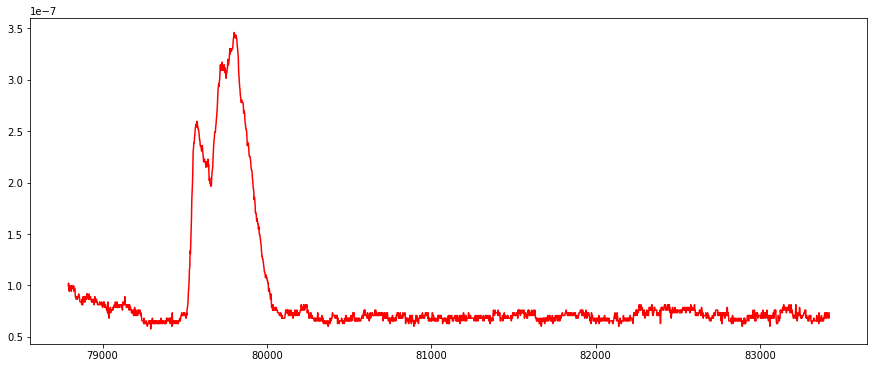

In [12]:
#原始数据绘制
from scipy import interpolate#插值用函数
for i in range(9,10):
    fig = plt.figure(figsize=(15,6))
    time1=sheet3_x_time[38000:][i] #约2s的分辨率
    plt.plot(time1,sheet3_x_value[38000:][i],color='r')
    plt.show()

In [ ]:
ype(np.float64(sheet_xrs['tsecs'][j]))